In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
from IPython.display import display
%matplotlib inline

`Propertycrime = α + Population + Population2 + Murder + Robbery`

The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.


In [2]:
# load data
df = pd.read_csv('./data/new-york.csv', thousands=",") # use "thousands" to handle the thousand comma separator
display(df.columns)

data = pd.DataFrame()
data["population"] = df["Population"]
data["population2"] = data["population"]**2
data["murder"] = (df["Murder and\rnonnegligent\rmanslaughter"] > 0).astype(int)
data["robery"] = (df["Robbery"] > 0).astype(int)
data["property_crime"] = df["Property\rcrime"]
data = data.dropna()
display(data.head())
data.shape

Index(['City', 'Population', 'Violent\rcrime',
       'Murder and\rnonnegligent\rmanslaughter',
       'Rape\r(revised\rdefinition)1', 'Rape\r(legacy\rdefinition)2',
       'Robbery', 'Aggravated\rassault', 'Property\rcrime', 'Burglary',
       'Larceny-\rtheft', 'Motor\rvehicle\rtheft', 'Arson3'],
      dtype='object')

,population,population2,murder,robery,property_crime
0,1861.0,3.463321e+06,0,0,12.0
1,2577.0,6.640929e+06,0,0,24.0
2,2846.0,8.099716e+06,0,0,16.0
3,97956.0,9.595378e+09,1,1,4090.0
4,6388.0,4.080654e+07,0,1,223.0


(348, 5)

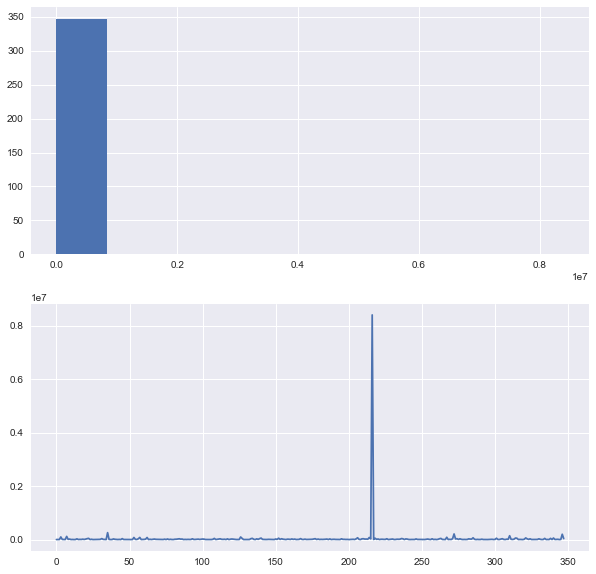

In [3]:
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.hist(data["population"])

plt.subplot(212)
plt.plot(data["population"])

(348,)

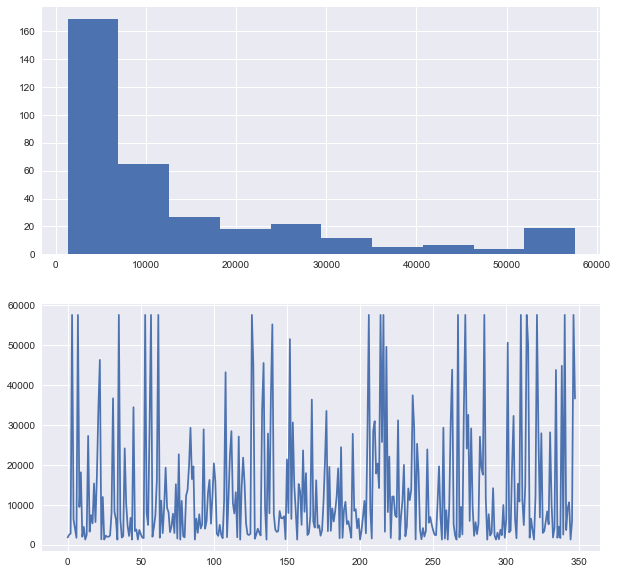

In [4]:
data_no_outliers = mstats.winsorize(data["population"], limits=0.05)

display(data_no_outliers.shape)

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.hist(data_no_outliers)

plt.subplot(212)
plt.plot(data_no_outliers)

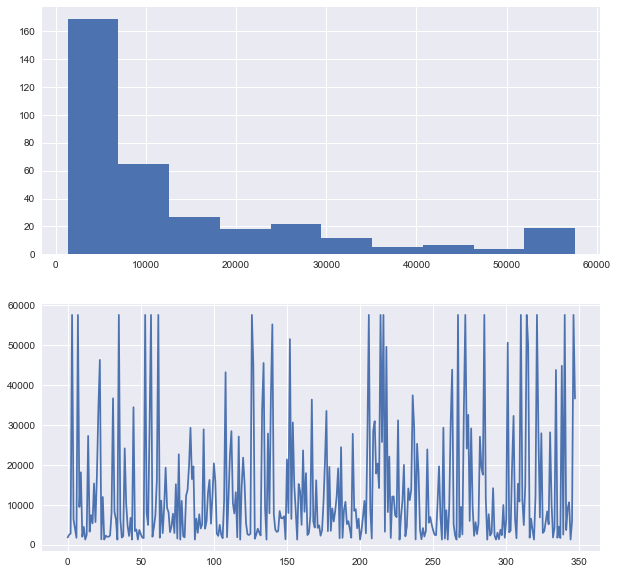

In [5]:
# The above looks clean, let's use that instead
data["population"] = mstats.winsorize(data["population"], limits=0.05)
data["population2"] = data["population"]**2

plt.figure(figsize=(10,10))

plt.subplot(211)
plt.hist(data["population"])

plt.subplot(212)
plt.plot(data["population"])

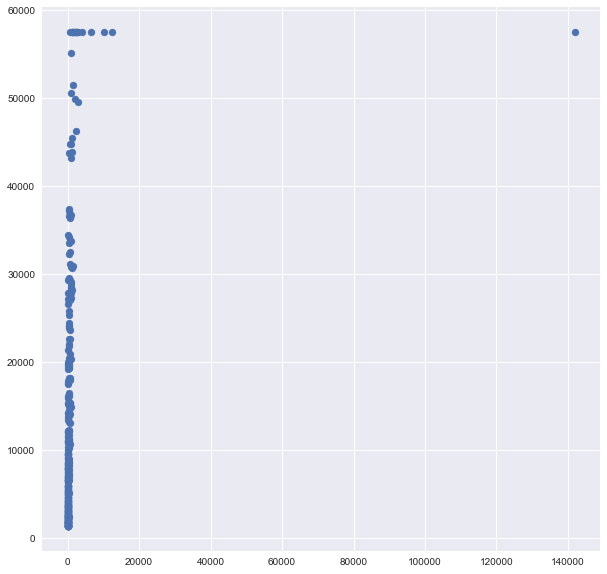

In [6]:
# Let's plot our features before we do any linear regression
plt.figure(figsize=(10,10))
plt.scatter(data["property_crime"], data["population"])

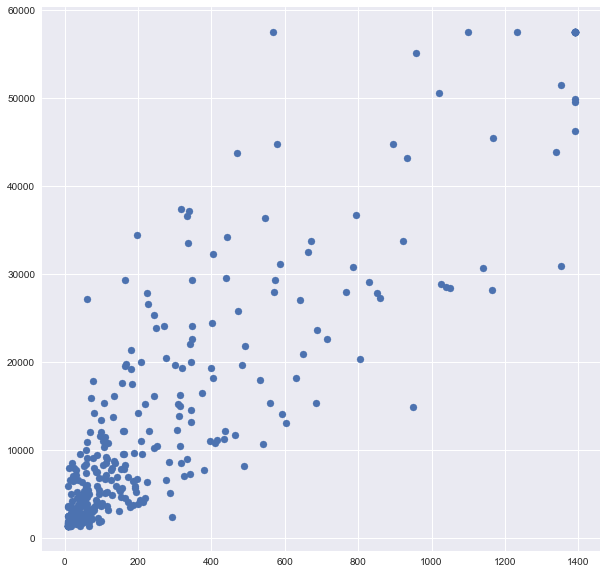

In [7]:
# We see there is a clear outlier, let's winsorize our target value (property_crime)
# Question: Is this O.K. to do?

data["property_crime"] = mstats.winsorize(data["property_crime"], limits=0.05)

plt.figure(figsize=(10,10))
plt.scatter(data["property_crime"], data["population"])

In [8]:
# Beginning of analysis

regr = linear_model.LinearRegression()
Y = data["property_crime"]
# X = data[["population", "population2", "murder", "robery"]]
X = data[["population", "murder", "robery"]]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

# Note: If we don't winsorize property_crime, we get an r2 of 0.086


Coefficients: 
 [  1.98148002e-02   1.01077032e+02   6.51881517e+01]

Intercept: 
 -42.7875688438

R-squared:
0.815280560288


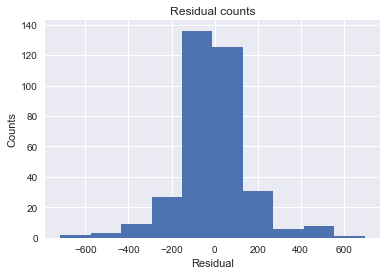

In [10]:
predicted = regr.predict(X).ravel()
actual = data["property_crime"]
residual = predicted - actual

plt.hist(residual)
plt.title("Residual counts")
plt.xlabel("Residual")
plt.ylabel("Counts")

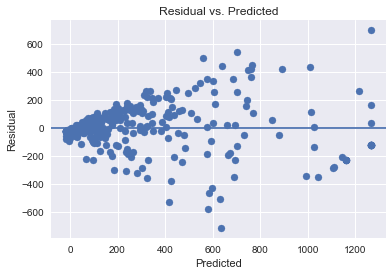

In [11]:
# Question: Is this a good or a bad example of homoscedasticity?

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')

In [12]:
# population and population2 are highly correlated.
# Question: should we only keep one of them?

correlation_matrix = X.corr()
display(correlation_matrix)

,population,murder,robery
population,1.000000,0.569270,0.482764
murder,0.569270,1.000000,0.313271
robery,0.482764,0.313271,1.000000


In [13]:
# Using this data, build a regression model to predict property crimes. 
# Question: How does this help us predict property crime? As in, how do we read the above table?

In [14]:
data_revised = pd.DataFrame()
data_revised["population"] = df["Population"]
data_revised["crime"] = df["Violent\rcrime"]
data_revised["murder"] = df["Murder and\rnonnegligent\rmanslaughter"]
data_revised["rape"] = df["Rape\r(legacy\rdefinition)2"]
data_revised["robbery"] = df["Robbery"]
data_revised["assault"] = df["Aggravated\rassault"]
data_revised["property_crime"] = df["Property\rcrime"]

data_revised = data_revised.dropna()

(array([ 347.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([      0. ,   14197.1,   28394.2,   42591.3,   56788.4,   70985.5,
          85182.6,   99379.7,  113576.8,  127773.9,  141971. ]),
 <a list of 10 Patch objects>)

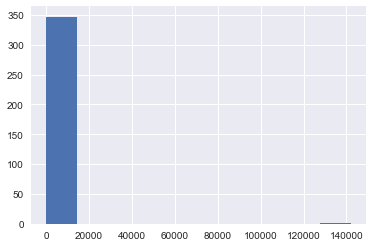

In [15]:
# Pretty much all of our values have extreme. Let's winsorize everything.
plt.hist(data_revised["property_crime"])

In [16]:
def remove_outliers(data):
    return mstats.winsorize(data, limits=0.05)

for d in data_revised.columns:
    data_revised[d] = remove_outliers(data_revised[d])

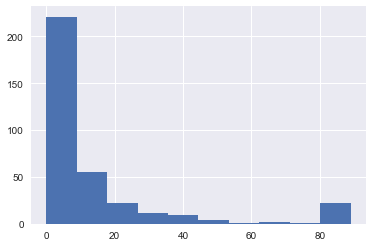

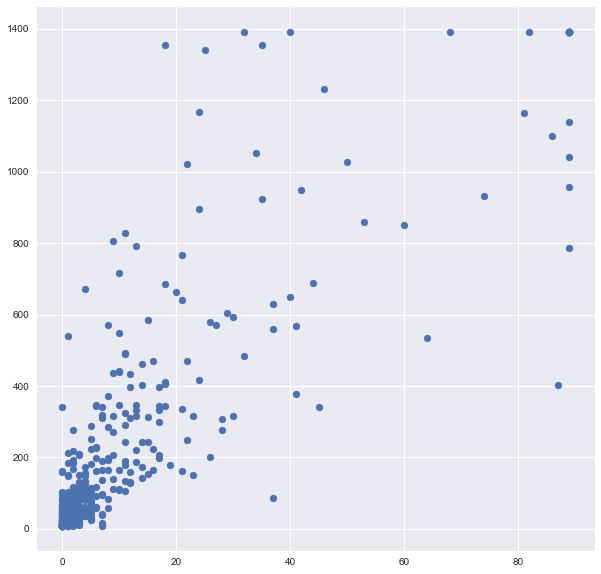

In [17]:
# These look much better, let's build our model now

var_to_plot = data_revised["assault"]

plt.hist(var_to_plot)
plt.figure(figsize=(10,10))
plt.scatter(var_to_plot, data_revised["property_crime"])

In [18]:
# New model

regr = linear_model.LinearRegression()
Y = data_revised["property_crime"]
X = data_revised[["population", "crime", "murder", "rape", "robbery", "assault"]]
regr.fit(X, Y)

# Inspect the results
print("\nCoefficients: ", regr.coef_)
print("\nIntercept: ", regr.intercept_)
print("\nR-squared: ", regr.score(X, Y))

# This is the highest R2 so far! Let's check our results.


Coefficients:  [  1.37718871e-02   5.79073068e-01  -5.58069810e+01   2.94264814e+01
   5.77826356e+00   1.40004440e-01]

Intercept:  2.65285668534

R-squared:  0.880987049995


(array([   2.,    3.,    6.,    8.,   29.,  171.,  103.,   15.,    9.,    2.]),
 array([-665.30777629, -550.61470763, -435.92163896, -321.2285703 ,
        -206.53550163,  -91.84243296,   22.8506357 ,  137.54370437,
         252.23677304,  366.9298417 ,  481.62291037]),
 <a list of 10 Patch objects>)

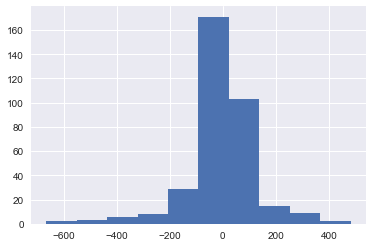

In [19]:
predicted = regr.predict(X).ravel()
actual = data_revised["property_crime"]
residual = predicted - actual

plt.hist(residual)

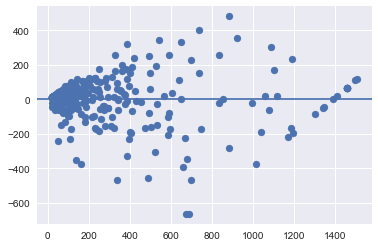

In [21]:
plt.scatter(predicted, residual)
plt.axhline(y=0)
# Question: Is this a good line?

In [24]:
X.corr()
# All of our data seems pretty correlated.
# Question: Are we not able to use linear regression in this case?
# Or would we be better off by just looking at one feature? (I don't think so since our R2 would be worst.)

,population,crime,murder,rape,robbery,assault
population,1.000000,0.807746,0.624830,0.681057,0.801370,0.793533
crime,0.807746,1.000000,0.716476,0.876001,0.967768,0.989995
murder,0.624830,0.716476,1.000000,0.648323,0.720477,0.700693
rape,0.681057,0.876001,0.648323,1.000000,0.803204,0.872439
robbery,0.801370,0.967768,0.720477,0.803204,1.000000,0.927886
assault,0.793533,0.989995,0.700693,0.872439,0.927886,1.000000
